
# Self Organizing Maps example - California Housing

In this document, the SOMPY lib is going to be used in order to provide an example of usage of the Self Organising Maps algorithm. The data to be used will be the California Housing dataset, included in the SciKit Learn library and included below

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sompy.sompy import SOMFactory
from sklearn.datasets import fetch_california_housing

## Data Loading

First of all the data is loaded into the local environment as a numpy array. 

In [2]:
data = fetch_california_housing()
descr = data.DESCR
names = fetch_california_housing().feature_names+["HouseValue"]

data = np.column_stack([data.data, data.target])
print(descr)
print( "FEATURES: ", ", ".join(names))

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

## SOM Training

The SOM training consists in 2 phases: the rough and the finetune one. The parameters that can be configured in the training step are:

- The size of each individual grid
- The rough and finetune iterations
- The rough and finetune initial and final radiuses
- The initialization mechanism (random/pca)

For the current example, only the rough/finetune iterations and the initialization mechanism parameters have been chosen. The other ones have not been specified so that the algorithm will choose them authomatically.  

For quantifying the error of the approximation, 2 metrics should be computed: 

- **The quantization error**: average distance between each data vector and its BMU.
- **The topographic error**: the proportion of all data vectors for which first and second BMUs are not adjacent units.

A rule of thumb is to generate several models with different parameters and choose the one which, having a topographic error very near to zero, has the lowest quantization error. It is important to hold the topographic error very low in order to make the components smooth and easy to understand. 

In [3]:
#msz = calculate_msz(data)
sm = SOMFactory().build(data, normalization = 'var', initialization='random', component_names=names)
sm.train(n_job=1, verbose=False, train_rough_len=2, train_finetune_len=5)

In [4]:
topographic_error = sm.calculate_topographic_error()
quantization_error = np.mean(sm._bmu[1])
print ("Topographic error = %s; Quantization error = %s" % (topographic_error, quantization_error))

Topographic error = 0.0008720930232558139; Quantization error = 0.8658952206606135


## Visualization

#### Components map

C:\Users\Gebruiker\anaconda4\lib\sompy\visualization\mapview.py:84: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(no_row_in_plot, no_col_in_plot, axis_num)


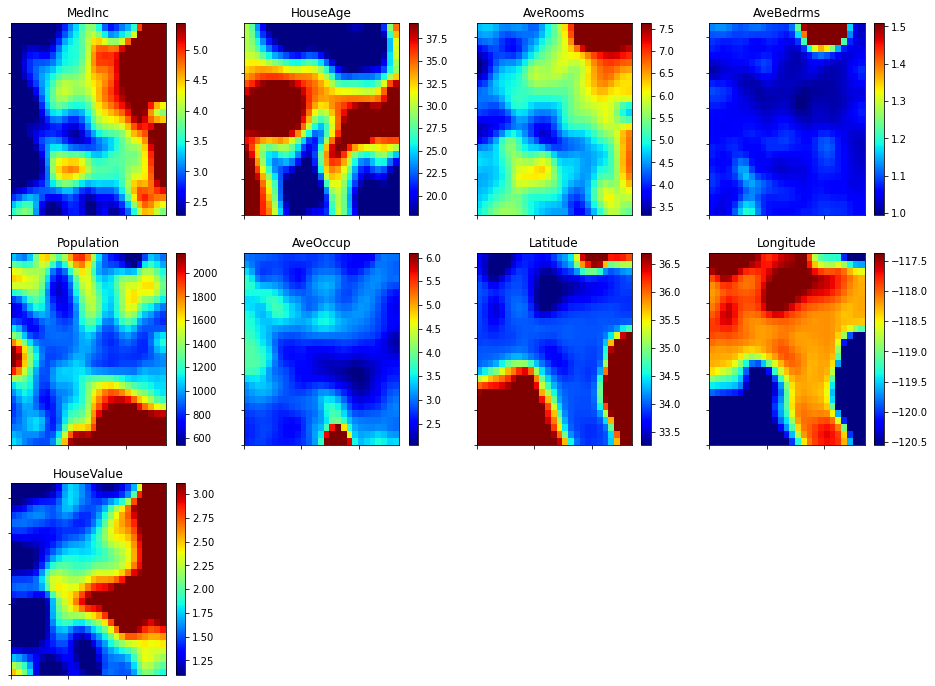

In [5]:

from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"rand data",text_size=10)
view2D.show(sm, col_sz=4, which_dim="all", desnormalize=True, labels = "None",cmap="jet")

#### Hits map

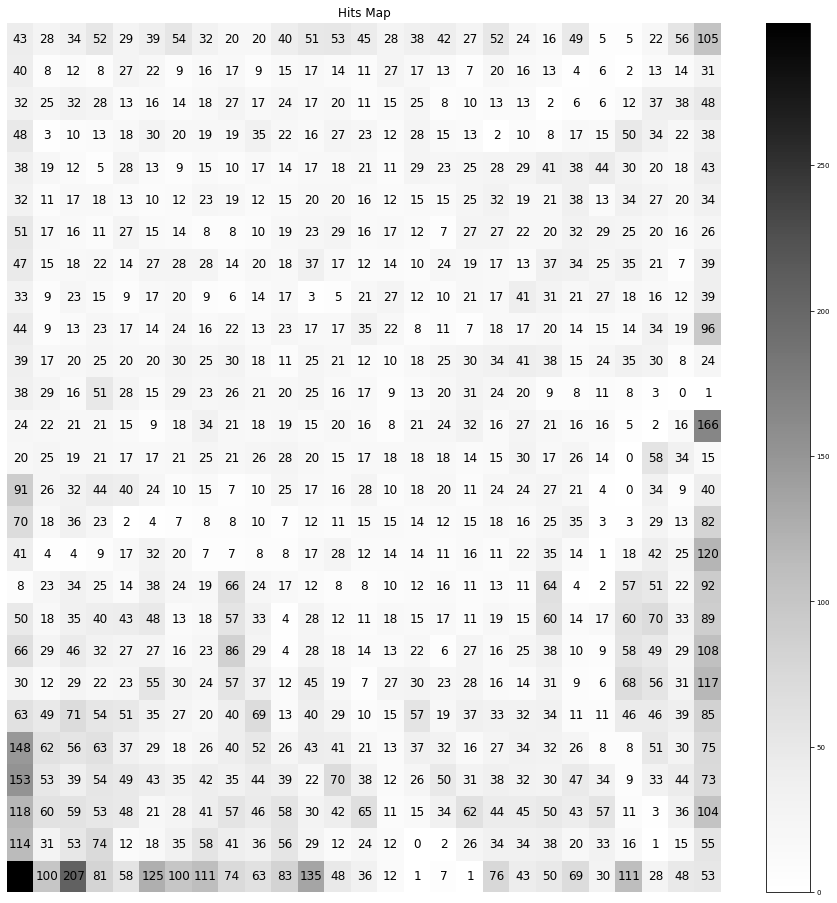

In [6]:
from sompy.visualization.bmuhits import BmuHitsView

vhts  = BmuHitsView(10,10,"Hits Map",text_size=7)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=12, cmap="Greys", logaritmic=False)

#### K-Means clustering

7
Performing K-means SSE elbow sweep...
Working on bootstrap sample 0 K: 2
Working on bootstrap sample 1 K: 2
Working on bootstrap sample 0 K: 3
Working on bootstrap sample 1 K: 3
Working on bootstrap sample 0 K: 4
Working on bootstrap sample 1 K: 4
Working on bootstrap sample 0 K: 5
Working on bootstrap sample 1 K: 5
Working on bootstrap sample 0 K: 6
Working on bootstrap sample 1 K: 6
Working on bootstrap sample 0 K: 7
Working on bootstrap sample 1 K: 7
SSE for k = 2 to 7 [195106.739804341, 137664.67755545097, 106061.17379652552, 84371.63148078638, 77476.30445559388, 59334.0223897058]
Optimal K = 6
Centroid 0[ 3.91116153e+00  2.40473050e+01  5.20119531e+00  1.06358394e+00
  1.64304039e+03  3.11314745e+00  3.44375050e+01 -1.18486098e+02
  2.06859998e+00]
Centroid 1[ 3.55980876e+00  2.04710187e+01  4.92722119e+00  1.06385026e+00
  3.12978977e+03  7.01862695e+00  3.49010789e+01 -1.18894527e+02
  1.80434496e+00]
Centroid 2[   3.86180566   31.34342635    5.6292992     1.14006764  982.3638

C:\Users\Gebruiker\anaconda4\lib\sompy\visualization\hitmap.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


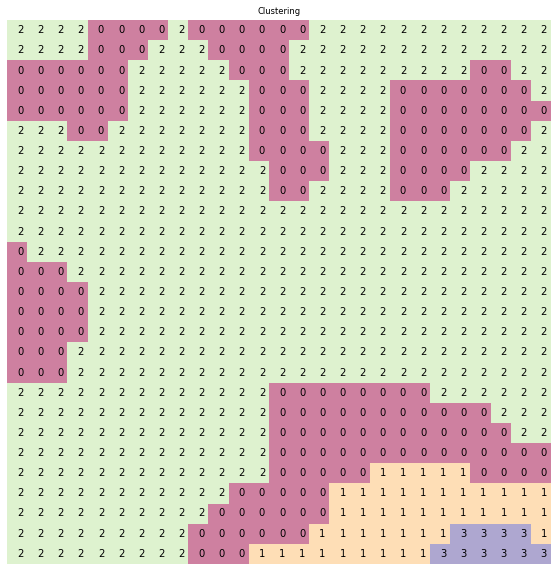

In [7]:
from sompy.visualization.hitmap import HitMapView

[labels, km, norm_data,SSE_BTS_K,K] = SSE = sm.cluster(n_clusters=5,sampless =2)

hits  = HitMapView(10,10,"Clustering",text_size=7)

a=hits.show(sm)

C:\Users\Gebruiker\anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


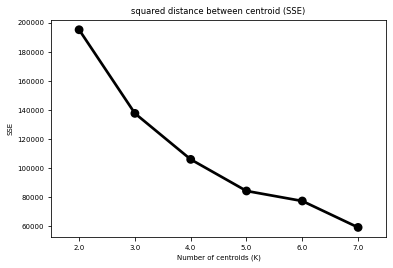

In [8]:
import seaborn as sns

y = SSE[3]
x = np.linspace(2,len(y)+1,len(y))

ax = sns.pointplot(x, y,color='black')

plt.title("squared distance between centroid (SSE)")
plt.xlabel('Number of centroids (K)')
plt.ylabel("SSE");

C:\Users\Gebruiker\anaconda4\lib\sompy\visualization\mapview.py:84: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(no_row_in_plot, no_col_in_plot, axis_num)
C:\Users\Gebruiker\anaconda4\lib\sompy\visualization\mapview.py:102: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labels != "None":


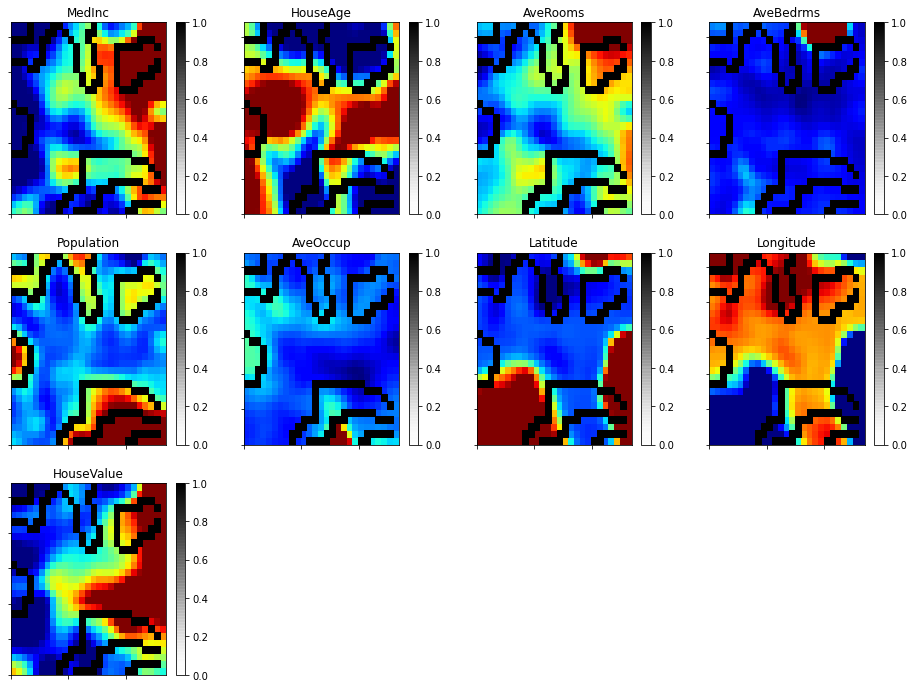

In [9]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"rand data",text_size=10)
view2D.show(sm, col_sz=4, which_dim="all", desnormalize=True, labels = km.labels_ ,cmap="jet");

## Conclusions

From the visualizations above we can extract different conclusions like,
- The houses which have, on average, more bedrooms are generally on lower average income areas.
- The highest occupations occours only in cities where the population is high.
- The latitude and longitude of the samples have a strong negative correlation. It can be because California is diagonally oriented with respect to the coordinates system.
- The most demanded houses (AveOccup) are placed on the 37~38 latitude and -121.6~-121 longitude; i.e. near San-Francisco area
- Old houses are more likely to have less rooms and bedrooms on average.
- Low average income areas usually have less rooms and bedrooms than high average ones
- The house value seems to be related with the average income of the area where it sits.

It is important to remark that there are areas on the map where the density of instances is lower than others. It is represented by the hit map and it should be taken in consideration when interpreting the components map.

The clustering map can be used to help to find out the different behaviors represented in the components map.